# 4.9 Part 2- Intro to Data Visualization in Python (TASK)

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_pickle(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_cust_merged.pkl')

In [3]:
df

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,busiest_period_of_day,loyalty_flag,spender_flag,frequency_flag,Gender,STATE,Age,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Most orders,Regular customer,NaN,Frequent customer,Male,Minnesota,81,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Average orders,Regular customer,Low spender,Frequent customer,Male,Minnesota,81,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Average orders,New customer,Low spender,Frequent customer,Female,Vermont,66,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Most orders,New customer,Low spender,Frequent customer,Female,Wisconsin,40,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Average orders,New customer,Low spender,Frequent customer,Female,Wisconsin,40,3,married,31308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,...,Most orders,New customer,NaN,Frequent customer,Female,Rhode Island,47,1,married,166687
32404855,49688,Fresh Foaming Cleanser,73,11,13.5,3401313,200377,1,4,11,...,Most orders,New customer,NaN,Non-frequent customer,Male,West Virginia,25,0,single,53936
32404856,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,...,Average orders,Regular customer,NaN,Frequent customer,Female,Michigan,57,1,married,100649
32404857,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,...,Most orders,Regular customer,NaN,Frequent customer,Female,Michigan,57,1,married,100649


# Histogram of order_hour_of_day:

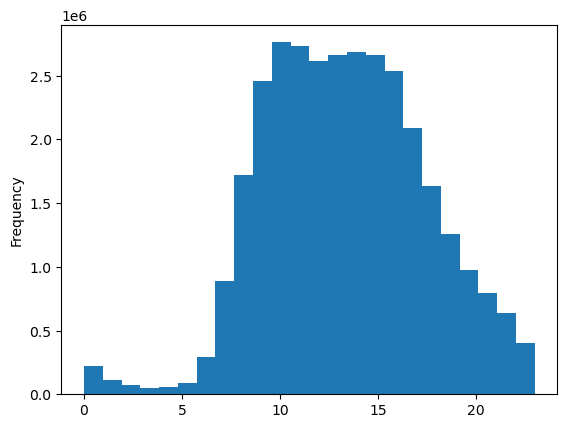

In [4]:
hist = df['order_hour_of_day'].plot.hist(bins = 24)

## This histogram is displaying the hour of the day the orders are being purchased. The most frequent time of day according to the histogram is 9-16. 

### (Since this is on a 0-24 scale it would technically be 10-17 on a 1-24 scale.)

# This means most orders are placed between the hours of 10AM and 5PM.

In [5]:
#Exporting histogram

hist.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/hist_hour_of_day.png')

# Distribution of loyalty_flag:

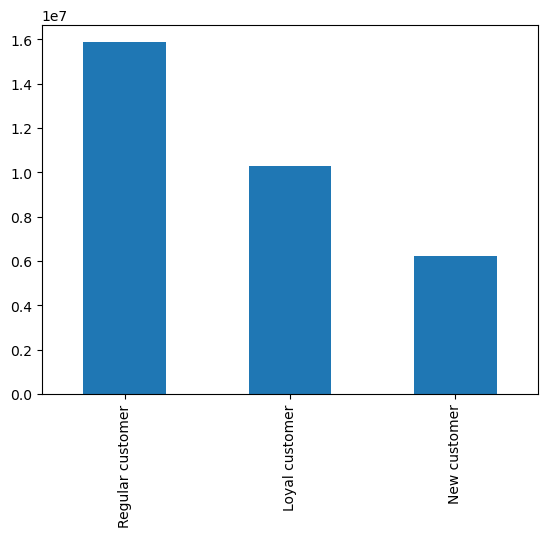

In [6]:
bar = df['loyalty_flag'].value_counts().plot.bar()

### The figure above displays the distribution of orders among customers. Regular customers tend to account for the most orders placed.

In [7]:
#Exporting bar chart

bar.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/bar_customer_loyalty.png')

# Line graph for expenditure depending on hour of day:

In [8]:
#Sampling data for line graph

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [9]:
#Storing 70% of dataframe in big sample

big = df[dev]

In [10]:
#Storing 30% of dataframe in small sample

small = df[~dev]

In [11]:
len(df)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
#Creating a smaller subset to run the line graph code on.

df_2 = small[['order_hour_of_day','prices']]

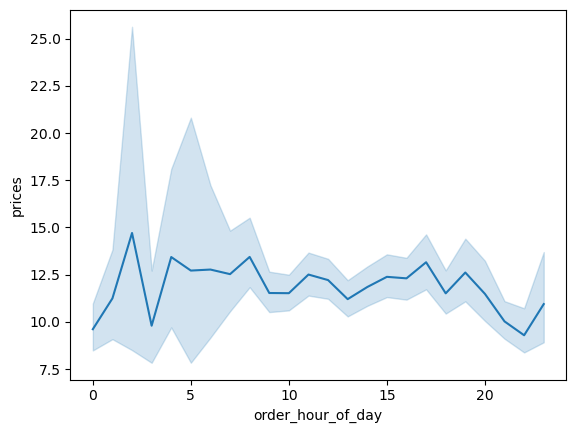

In [14]:
#Creating line graph to display expenditure and hour of day

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### The graph above displays the prices of items purchased and the hour of the purchase. The prices seem to flucuate between 9 and 15 dollars on average per item. 

In [15]:
#Exporting line graph

line.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/line_price_hour_of_day.png')

# Determining if there is a relationship between age and # of dependents.

In [16]:
#Creating a smaller df for line graph

df_3 = small[['Age','n_dependants']]

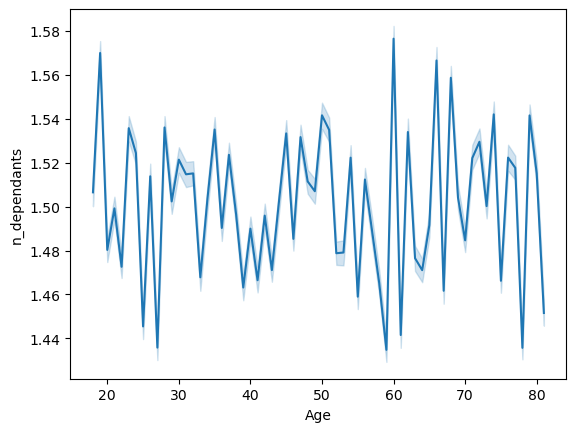

In [17]:
#Creating line graph to display age and # of dependents

line = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

### The line graph above displays the relationship between number of dependents and age. According to the graph, there is an average of 1 dependent for the ages 18-81.

In [18]:
line.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/line_age_n_depend.png')

# Scatter plot: Age vs. Income

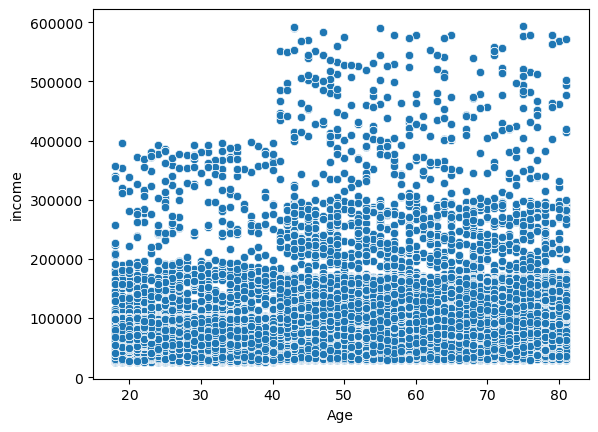

In [19]:
scatter = sns.scatterplot(x = 'Age', y = 'income',data = df)

## The scatter plot does not display a clear correlation between age and income. It does display that people who reported an income > 400,000 are people 40+ years old. 

In [20]:
scatter.figure.savefig(r'/Users/dorinasalam/Desktop/08-2023 Instacart Basket Analysis/04 Analysis/Visualizations/scatter_age_income.png')

In [21]:
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [22]:
crosstab.to_clipboard()